Objectives:
1)To visualize and analyze the time series data.
2)To develop a predictive model using Support Vector Machines.


In [118]:
#Importing all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')


In [119]:
#reading all relevant datasets 
confirmedcases=pd.read_csv(r'C:\Users\Administrator\Desktop\time_series_covid_19_confirmed.csv')
recoveredcases=pd.read_csv(r'C:\Users\Administrator\Desktop\time_series_covid_19_recovered.csv')
expiredcases=pd.read_csv(r'C:\Users\Administrator\Desktop\time_series_covid_19_deaths.csv')

In [120]:
#Data wrangling to make sure dataset is in required shape
confirmed_cases=confirmedcases.drop(columns=['Lat', 'Long'])
recovered_cases=recoveredcases.drop(columns=['Lat', 'Long'])
expired_cases=expiredcases.drop(columns=['Lat', 'Long'])

confirmed_cases["Province/State"].fillna("For all provinces combined", inplace = True) 
recovered_cases["Province/State"].fillna("For all provinces combined", inplace = True) 
expired_cases["Province/State"].fillna("For all provinces combined", inplace = True) 

columns=confirmed_cases.keys()
confirmed=confirmed_cases.loc[:,columns[2]:columns[-1]]
recovered=recovered_cases.loc[:,columns[2]:columns[-1]]
expired=expired_cases.loc[:,columns[2]:columns[-1]]

dates=confirmed.keys()
totalcases=[]
totalrecoveries=[]
totaldeaths=[]
for i in dates:
    confirmedcount=confirmed[i].sum()
    totalcases.append(confirmedcount)
    
    recoveredcount=recovered[i].sum()
    totalrecoveries.append(recoveredcount)
    
    expiredcount=expired[i].sum()
    totaldeaths.append(expiredcount)

    
    



In [121]:
#total cases till 17th May 2020 globally:
confirmedcount



4713620

In [122]:
#total recoveries till 17th May 2020 globally:
recoveredcount

1733963

In [123]:
#total deaths till 17th May 2020 globally:
expiredcount


315185

In [124]:
#Converting all the appended data to numpy arrays
days_since_1_22_2020=np.array([i for i in range(len(dates))]).reshape(-1,1)
totalcases=np.array(totalcases)
totalrecoveries=np.array(totalrecoveries).reshape(-1,1)
totaldeaths=np.array(totaldeaths).reshape(-1,1)






In [125]:
#building dates array of forecast for next 60 days
daysinfuture=60
futureforecast=np.array([i for i in range (len(dates)+daysinfuture)]).reshape(-1,1)
adjusted_dates=futureforecast[:-60]

    
firstdate='5/17/2020'
#converting into datetime format from int type
start_date=datetime.datetime.strptime(firstdate,'%m/%d/%Y')

futureforecastdates=[]
for i in range(len(futureforecast)):
    futureforecastdates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [126]:
#for visualizations of data till 17th May 2020 we tinker with our dataset to compute certain statistics in order to understand it better
latest_confirmed_cases=confirmedcases[dates[-1]]
latest_recovered_cases=recoveredcases[dates[-1]]
latest_expired_cases=expiredcases[dates[-1]]

#----confirmed positive cases for each country---- 
countries=list(confirmedcases['Country/Region'].unique())
countrywise_confirmed_cases=[]
zerocases=[]

for i in countries:
    cases = latest_confirmed_cases[confirmedcases['Country/Region']==i].sum()
    if cases > 0:
        countrywise_confirmed_cases.append(cases)
    else:
        zerocases.append(i)
        
for i in zerocases:
    countries.remove(i)
    
countries=[k for k, v in sorted(zip(countries,countrywise_confirmed_cases), key=operator.itemgetter(1),reverse=True)] #sorts in accordance to magnitude
    
for i in range(len(countries)):
    countrywise_confirmed_cases[i] = latest_confirmed_cases[confirmedcases['Country/Region']==countries[i]].sum()
    
print("Confirmed cases by Country are:")
for i in range(len(countries)):    
    print(f'{countries[i]}:{countrywise_confirmed_cases[i]} case(s)')




Confirmed cases by Country are:
US:1486757 case(s)
Russia:281752 case(s)
United Kingdom:244995 case(s)
Brazil:241080 case(s)
Spain:230698 case(s)
Italy:225435 case(s)
France:179693 case(s)
Germany:176369 case(s)
Turkey:149435 case(s)
Iran:120198 case(s)
India:95698 case(s)
Peru:92273 case(s)
China:84054 case(s)
Canada:78332 case(s)
Belgium:55280 case(s)
Saudi Arabia:54752 case(s)
Mexico:49219 case(s)
Netherlands:44195 case(s)
Chile:43781 case(s)
Pakistan:40151 case(s)
Ecuador:33182 case(s)
Qatar:32604 case(s)
Switzerland:30587 case(s)
Sweden:30143 case(s)
Belarus:29650 case(s)
Portugal:29036 case(s)
Singapore:28038 case(s)
Ireland:24112 case(s)
United Arab Emirates:23358 case(s)
Bangladesh:22268 case(s)
Poland:18529 case(s)
Ukraine:18291 case(s)
Indonesia:17514 case(s)
Romania:16871 case(s)
Israel:16617 case(s)
Japan:16285 case(s)
Austria:16242 case(s)
Colombia:15574 case(s)
South Africa:15515 case(s)
Kuwait:14850 case(s)
Philippines:12513 case(s)
Dominican Republic:12314 case(s)
Egypt

In [127]:
#----recovered cases for each country---- 
countries=list(recoveredcases['Country/Region'].unique())
countrywise_recovered_cases=[]
zerocases=[]

for i in countries:
    cases = latest_recovered_cases[recoveredcases['Country/Region']==i].sum()
    if cases > 0:
        countrywise_recovered_cases.append(cases)
    else:
        zerocases.append(i)
        
for i in zerocases:
    countries.remove(i)
    
for i in range(len(countries)):
    countrywise_recovered_cases[i] = latest_recovered_cases[recovered_cases['Country/Region']==countries[i]].sum()
    
print("Recovered cases by Country are:")
for i in range(len(countries)):    
    print(f'{countries[i]}:{countrywise_recovered_cases[i]} case(s)')


Recovered cases by Country are:
Afghanistan:778 case(s)
Albania:715 case(s)
Algeria:3507 case(s)
Andorra:617 case(s)
Angola:17 case(s)
Antigua and Barbuda:19 case(s)
Argentina:2569 case(s)
Armenia:1925 case(s)
Australia:6392 case(s)
Austria:14563 case(s)
Azerbaijan:2015 case(s)
Bahamas:42 case(s)
Bahrain:2910 case(s)
Bangladesh:4373 case(s)
Barbados:68 case(s)
Belarus:9932 case(s)
Belgium:14630 case(s)
Belize:16 case(s)
Benin:83 case(s)
Bhutan:5 case(s)
Bolivia:493 case(s)
Bosnia and Herzegovina:1436 case(s)
Brazil:94122 case(s)
Brunei:136 case(s)
Bulgaria:598 case(s)
Burkina Faso:644 case(s)
Cabo Verde:84 case(s)
Cambodia:122 case(s)
Cameroon:1567 case(s)
Canada:38563 case(s)
Central African Republic:13 case(s)
Chad:117 case(s)
Chile:19213 case(s)
China:79306 case(s)
Colombia:3751 case(s)
Congo (Brazzaville):87 case(s)
Congo (Kinshasa):270 case(s)
Costa Rica:565 case(s)
Cote d'Ivoire:1004 case(s)
Croatia:1936 case(s)
Diamond Princess:651 case(s)
Cuba:1495 case(s)
Cyprus:515 case(s)
Cz

In [128]:
#----death cases for each country---- 
countries=list(expiredcases['Country/Region'].unique())
countrywise_expired_cases=[]
zerocases=[]

for i in countries:
    cases = latest_expired_cases[expiredcases['Country/Region']==i].sum()
    if cases > 0:
        countrywise_expired_cases.append(cases)
    else:
        zerocases.append(i)
        
for i in zerocases:
    countries.remove(i)
    
for i in range(len(countries)):
    countrywise_expired_cases[i] = latest_expired_cases[expiredcases['Country/Region']==countries[i]].sum()
    
print("Death cases by Country are:")
for i in range(len(countries)):    
    print(f'{countries[i]}:{countrywise_expired_cases[i]} case(s)')



    
       

Death cases by Country are:
Afghanistan:169 case(s)
Albania:31 case(s)
Algeria:548 case(s)
Andorra:51 case(s)
Angola:2 case(s)
Antigua and Barbuda:3 case(s)
Argentina:373 case(s)
Armenia:60 case(s)
Australia:99 case(s)
Austria:629 case(s)
Azerbaijan:39 case(s)
Bahamas:11 case(s)
Bahrain:12 case(s)
Bangladesh:328 case(s)
Barbados:7 case(s)
Belarus:165 case(s)
Belgium:9052 case(s)
Benin:2 case(s)
Bolivia:169 case(s)
Bosnia and Herzegovina:133 case(s)
Brazil:16118 case(s)
Brunei:1 case(s)
Bulgaria:108 case(s)
Burkina Faso:51 case(s)
Cabo Verde:3 case(s)
Cameroon:140 case(s)
Canada:5903 case(s)
Chad:53 case(s)
Chile:450 case(s)
China:4638 case(s)
Colombia:574 case(s)
Congo (Brazzaville):15 case(s)
Congo (Kinshasa):61 case(s)
Costa Rica:10 case(s)
Cote d'Ivoire:27 case(s)
Croatia:95 case(s)
Diamond Princess:13 case(s)
Cuba:79 case(s)
Cyprus:17 case(s)
Czechia:298 case(s)
Denmark:547 case(s)
Djibouti:4 case(s)
Dominican Republic:428 case(s)
Ecuador:2736 case(s)
Egypt:630 case(s)
El Salvador:

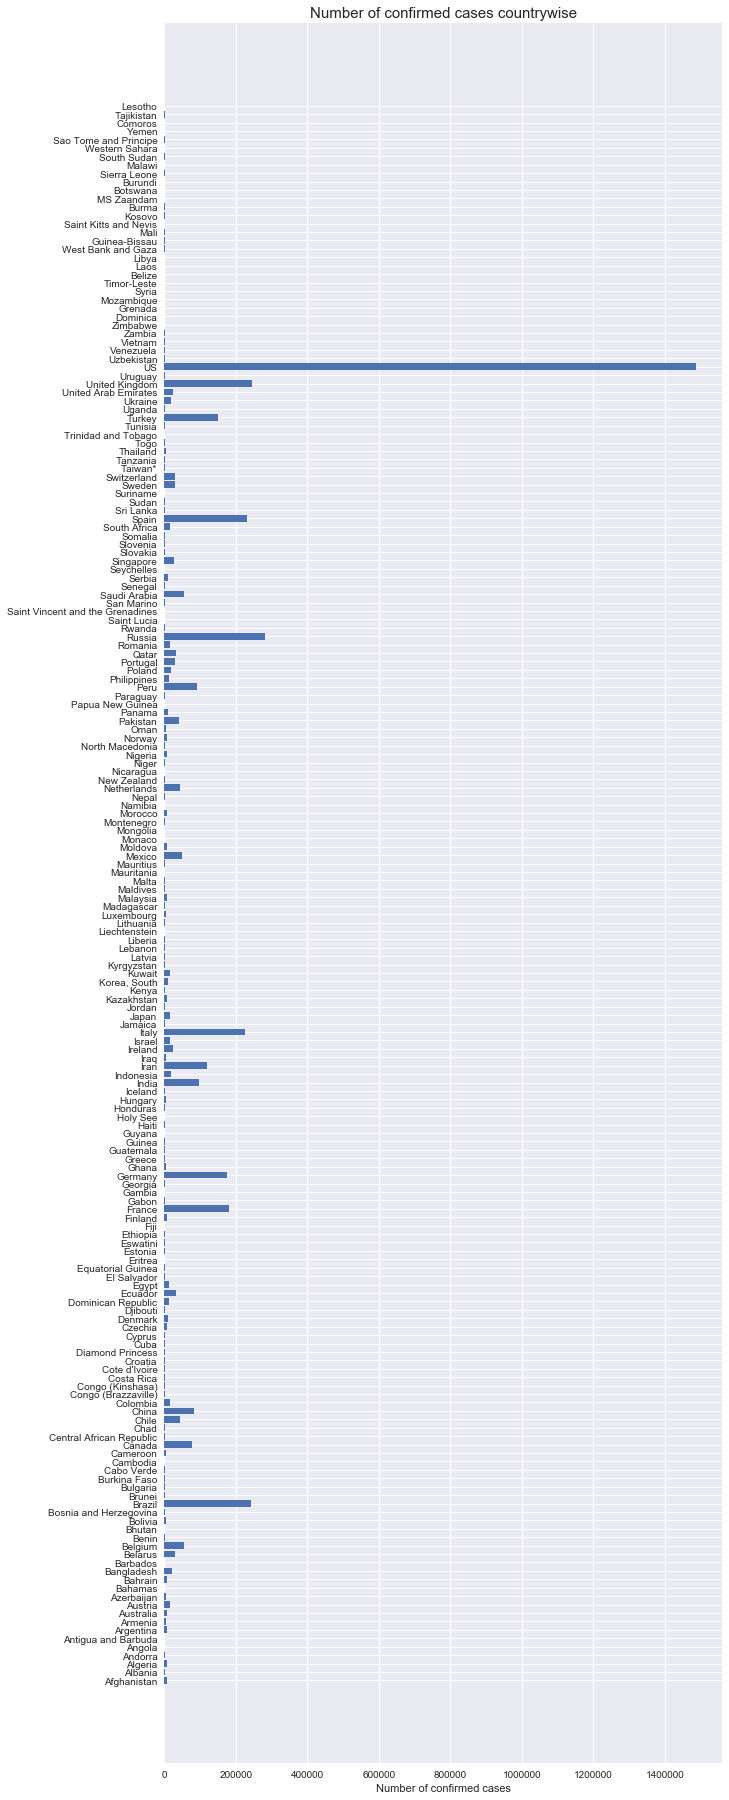

In [129]:
#plotting the no of positive cases per country's bar graph against the total no of cases
countries=list(confirmedcases['Country/Region'].unique())
for i in range(len(countries)):
    countrywise_confirmed_cases[i] = latest_confirmed_cases[confirmedcases['Country/Region']==countries[i]].sum()

plt.figure(figsize=(10,32))
plt.barh(countries,countrywise_confirmed_cases)
plt.title("Number of confirmed cases countrywise",size=15)
plt.xlabel("Number of confirmed cases")
plt.show()

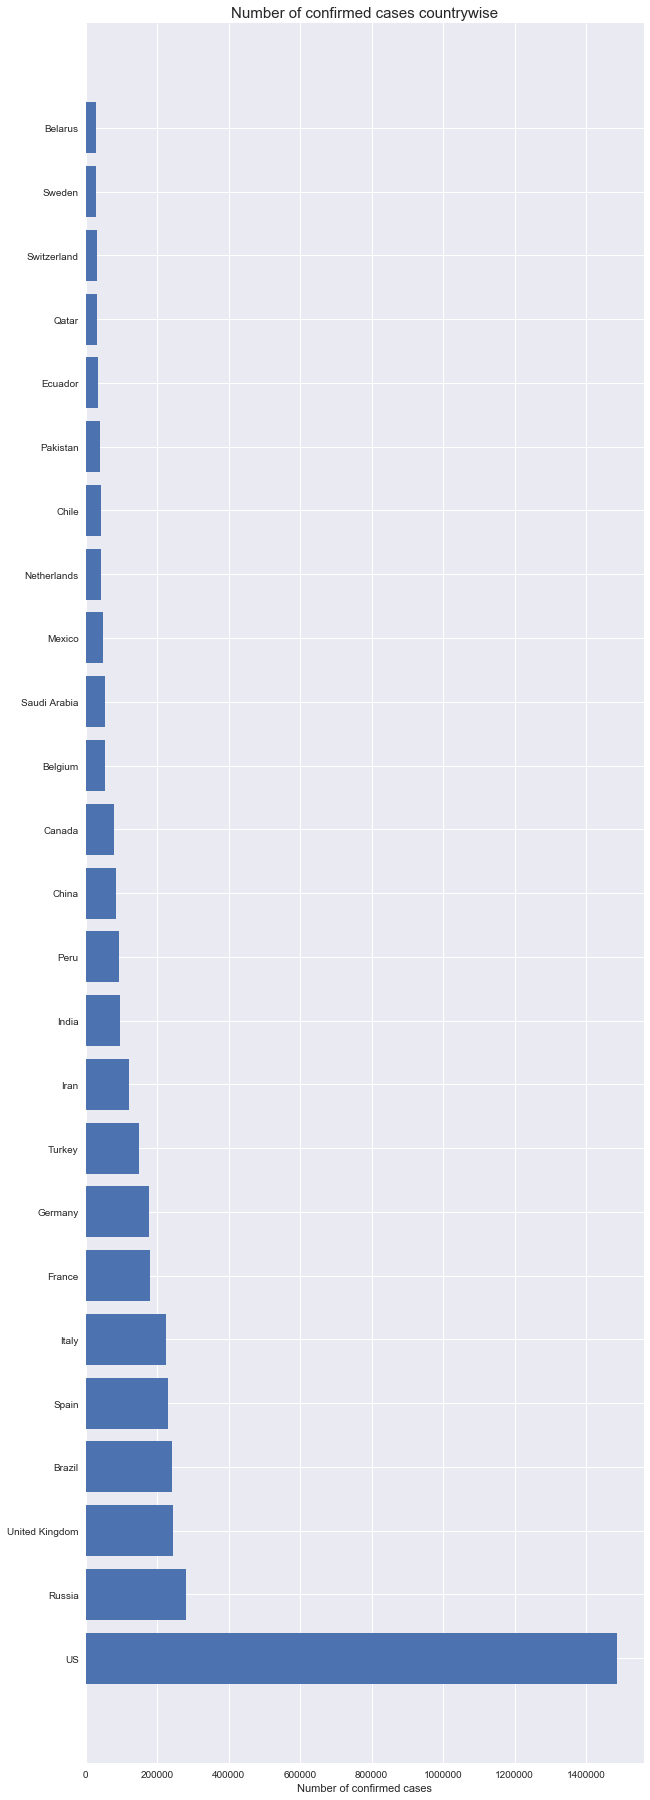

In [130]:
#Visualizations for top 25 countries with most positive confirmed cases using Bar graph
visual_unique_countries=[]
visual_confirmed_cases=[]


latest_confirmed_cases=confirmedcases[dates[-1]]
latest_recovered_cases=recoveredcases[dates[-1]]
latest_expired_cases=expiredcases[dates[-1]]

#----confirmed positive cases for each country---- 
countries=list(confirmedcases['Country/Region'].unique())
countrywise_confirmed_cases=[]
zerocases=[]

for i in countries:
    cases = latest_confirmed_cases[confirmedcases['Country/Region']==i].sum()
    if cases > 0:
        countrywise_confirmed_cases.append(cases)
    else:
        zerocases.append(i)
        
for i in zerocases:
    countries.remove(i)
    
countries=[k for k, v in sorted(zip(countries,countrywise_confirmed_cases), key=operator.itemgetter(1),reverse=True)] #sorts in accordance to magnitude
    
for i in range(len(countries)):
    countrywise_confirmed_cases[i] = latest_confirmed_cases[confirmedcases['Country/Region']==countries[i]].sum()


others=np.sum(countrywise_confirmed_cases[25:]) #the countries that are not in top 25
for i in range(len(countrywise_confirmed_cases[:25])):
    visual_unique_countries.append(countries[i])
    visual_confirmed_cases.append(countrywise_confirmed_cases[i])

plt.figure(figsize=(10,32))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title("Number of confirmed cases countrywise",size=15)
plt.xlabel("Number of confirmed cases")
plt.show()
    

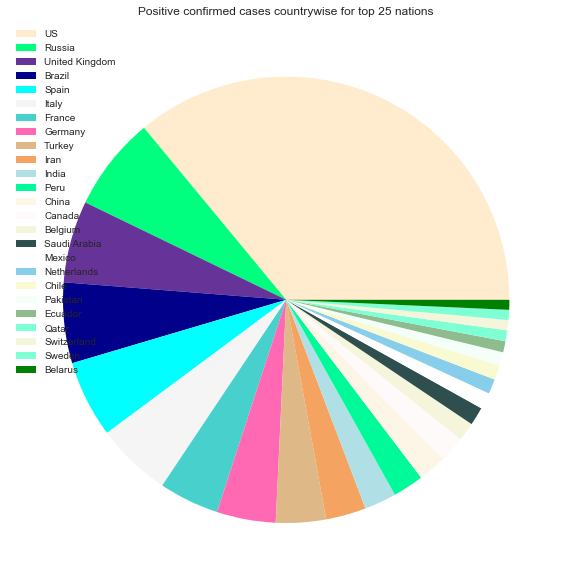

In [134]:
#Visualization of top 25 countries with respect to total confirmed positive cases via Pie chart
plt.figure(figsize=(10,32))
c=random.choices(list(mcolors.CSS4_COLORS.values()),k= len(countries))
plt.pie(visual_confirmed_cases,colors=c)
plt.title("Positive confirmed cases countrywise for top 25 nations")
plt.legend(visual_unique_countries[0:],loc='best')
plt.show()


In [135]:
#Implementing a SVM model for predictive analysis:
kernel = ['poly','sigmoid','rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1 , 1]
shrinking = [True, False]

svm_grid = {'kernel':kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}
svm = SVR()
svm_search = RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=50,verbose=1)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22_2020, totalcases, test_size=0.20, shuffle=False)
svm_search.fit(X_train_confirmed,y_train_confirmed)




Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [138]:
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_confirmed

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [139]:
svm_pred = svm_confirmed.predict(futureforecast)
svm_pred

array([-3.13062150e+04, -3.13028500e+04, -3.12792950e+04, -3.12153600e+04,
       -3.10908550e+04, -3.08855900e+04, -3.05793750e+04, -3.01520200e+04,
       -2.95833350e+04, -2.88531301e+04, -2.79412151e+04, -2.68274002e+04,
       -2.54914952e+04, -2.39133103e+04, -2.20726554e+04, -1.99493405e+04,
       -1.75231756e+04, -1.47739707e+04, -1.16815359e+04, -8.22568101e+03,
       -4.38621619e+03, -1.42951380e+02,  4.52430340e+03,  9.63573817e+03,
        1.52115429e+04,  2.12719076e+04,  2.78370223e+04,  3.49270770e+04,
        4.25622617e+04,  5.07627663e+04,  5.95487809e+04,  6.89404955e+04,
        7.89581000e+04,  8.96217845e+04,  1.00951739e+05,  1.12968153e+05,
        1.25691218e+05,  1.39141122e+05,  1.53338057e+05,  1.68302211e+05,
        1.84053775e+05,  2.00612939e+05,  2.17999894e+05,  2.36234828e+05,
        2.55337932e+05,  2.75329396e+05,  2.96229410e+05,  3.18058164e+05,
        3.40835848e+05,  3.64582652e+05,  3.89318766e+05,  4.15064380e+05,
        4.41839683e+05,  

MAE: 175943.10106160646
MSE: 52817637781.00216


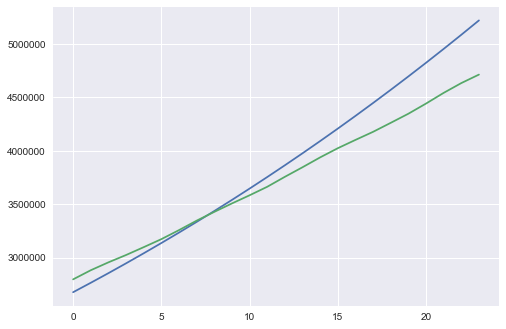

In [140]:
#Checking against test data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)

#printing the Mean absolute and Mean squared errors:
print('MAE:',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred,y_test_confirmed))



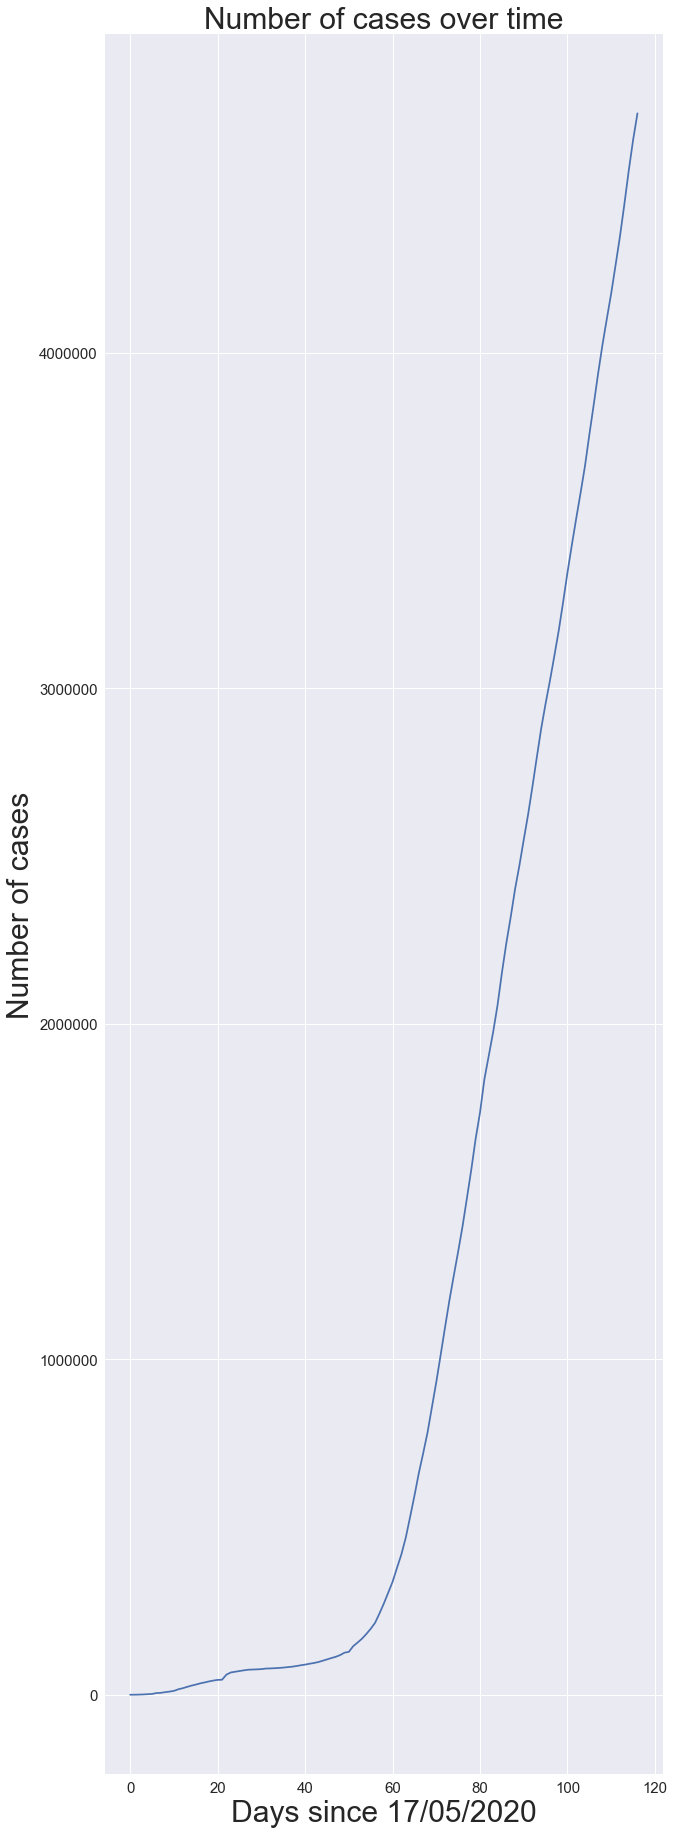

In [141]:
#Total number of cases over time:


plt.figure(figsize=(10,32))
plt.plot(adjusted_dates,totalcases)
plt.title("Number of cases over time",size=30)
plt.xlabel("Days since 17/05/2020",size=30)
plt.ylabel("Number of cases",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

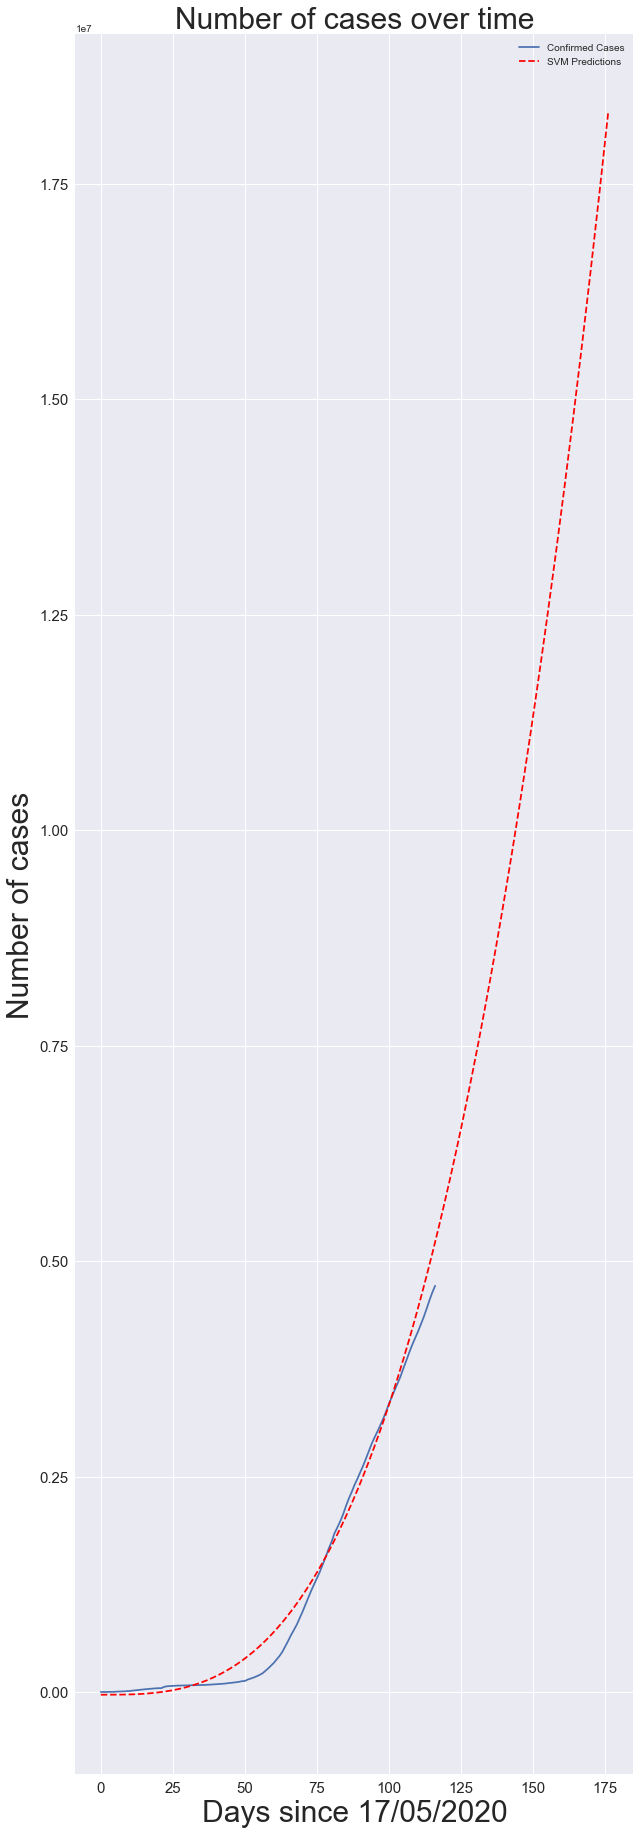

In [142]:
#Confirmed vs Predicted cases:

plt.figure(figsize=(10,32))
plt.plot(adjusted_dates,totalcases)
plt.plot(futureforecast,svm_pred, linestyle='dashed', color='red')
plt.title("Number of cases over time",size=30)
plt.xlabel("Days since 17/05/2020",size=30)
plt.ylabel("Number of cases",size=30)
plt.legend(['Confirmed Cases','SVM Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [146]:
#Forecast of confirmed cases over the next 5 months using SVM:

print("SVM's next 5 months prediction is as follows:")
set(zip(futureforecastdates[:-10],svm_pred[:-10]))



SVM's next 6 months prediction is as follows:


{('05/17/2020', -31306.214955019826),
 ('05/18/2020', -31302.849955173868),
 ('05/19/2020', -31279.294956252157),
 ('05/20/2020', -31215.359959174475),
 ('05/21/2020', -31090.854964878472),
 ('05/22/2020', -30885.589974257226),
 ('05/23/2020', -30579.374988257016),
 ('05/24/2020', -30152.020007806892),
 ('05/25/2020', -29583.33503388899),
 ('05/26/2020', -28853.130067321534),
 ('05/27/2020', -27941.21510891902),
 ('05/28/2020', -26827.40016007709),
 ('05/29/2020', -25491.49522091734),
 ('05/30/2020', -23913.31029321539),
 ('05/31/2020', -22072.65537731635),
 ('06/01/2020', -19949.34047477233),
 ('06/02/2020', -17523.17558597314),
 ('06/03/2020', -14773.970711874837),
 ('06/04/2020', -11681.535853433485),
 ('06/05/2020', -8225.681011664743),
 ('06/06/2020', -4386.216186213369),
 ('06/07/2020', -142.95138041960672),
 ('06/08/2020', 4524.303404522067),
 ('06/09/2020', 9635.73817224515),
 ('06/10/2020', 15211.542917800074),
 ('06/11/2020', 21271.907639813548),
 ('06/12/2020', 27837.0223394

Key Insights/Takeaways:
1)
2)
3)

